# Seattle Weather Analysis

Kaggle / dataset: [Did it rain in Seattle? (1948-2017)](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017#seattleWeather_1948-2017.csv)

![](http://1.bp.blogspot.com/-_j8kHhzKeHM/UL1_DpqN8NI/AAAAAAAAMKQ/BGvRVwmgmAM/s1600/tumblr_m66m4ryYrg1qd6wxeo1_500.jpg)

This data was collected at the [Seattle-Tacoma International Airport](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND%3aUSW00024233/detail). The dataset contains five columns:

* DATE = the date of the observation
* PRCP = the amount of precipitation, in inches
* TMAX = the maximum temperature for that day, in degrees Fahrenheit
* TMIN = the minimum temperature for that day, in degrees Fahrenheit
* RAIN = TRUE if rain was observed on that day, FALSE if it was not

#### Acknowledgements:
This dataset was compiled by NOAA and is in the public domain.

In [41]:
library(tidyverse) # utility functions

In [42]:
rain <- read.csv("./seattleWeather_1948-2017.csv")
head(rain)

DATE,PRCP,TMAX,TMIN,RAIN
1948-01-01,0.47,51,42,TRUE
1948-01-02,0.59,45,36,TRUE
1948-01-03,0.42,45,35,TRUE
1948-01-04,0.31,45,34,TRUE
1948-01-05,0.17,45,32,TRUE
1948-01-06,0.44,48,39,TRUE


In [43]:
str(rain)

'data.frame':	25551 obs. of  5 variables:
 $ DATE: Factor w/ 25551 levels "1948-01-01","1948-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PRCP: num  0.47 0.59 0.42 0.31 0.17 0.44 0.41 0.04 0.12 0.74 ...
 $ TMAX: int  51 45 45 45 45 48 50 48 50 43 ...
 $ TMIN: int  42 36 35 34 32 39 40 35 31 34 ...
 $ RAIN: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


summarize only numerical values

In [44]:
summary(dplyr::select_if(rain, is.numeric))

      PRCP             TMAX             TMIN      
 Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :5.0200   Max.   :103.00   Max.   :71.00  
 NA's   :3                                        

### Data Cleaning

In [45]:
table(is.na(rain))


 FALSE   TRUE 
127749      6 

it appears that we have 6 of rows that have missing values/ 

In [46]:
colSums(is.na(rain))

DATE PRCP TMAX TMIN RAIN 
   0    3    0    0    3

In [47]:
# create new dataset without missing data 
rain <- na.omit(rain)

### Data Formatting

In [48]:
# convert the format of the DATE column from factors to Date
rain$DATE <- as.Date(rain$DATE)

# create year column
rain$year <- format(as.Date(rain$DATE, format="%d/%m/%Y"),"%Y")
rain$year <- as.numeric(as.character(rain$year))
summary(rain)

      DATE                 PRCP             TMAX             TMIN      
 Min.   :1948-01-01   Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:1965-06-26   1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :1982-12-21   Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :1982-12-22   Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:2000-06-18   3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :2017-12-14   Max.   :5.0200   Max.   :103.00   Max.   :71.00  
    RAIN              year     
 Mode :logical   Min.   :1948  
 FALSE:14648     1st Qu.:1965  
 TRUE :10900     Median :1982  
                 Mean   :1982  
                 3rd Qu.:2000  
                 Max.   :2017  

In [49]:
rain$day <- weekdays(rain$DATE)
table(rain$day)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
     3650      3649      3650      3650      3651      3649      3649 

## Exploratory Analysis

### Plot Daily Preciptation

We will use the daily plots to view the data plotted by date.

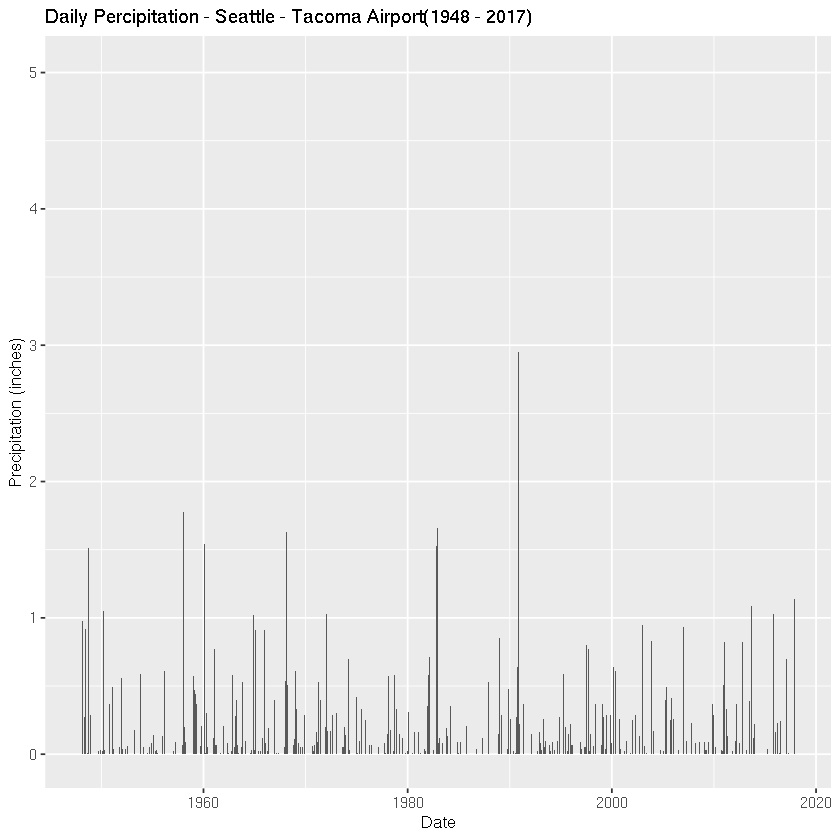

In [50]:
ggplot(data = rain, 
      aes(DATE, PRCP)) + 
    geom_bar(stat="identity") +
    xlab("Date") +
    ylab("Precipitation (inches)")+
    ggtitle("Daily Percipitation - Seattle - Tacoma Airport(1948 - 2017)")

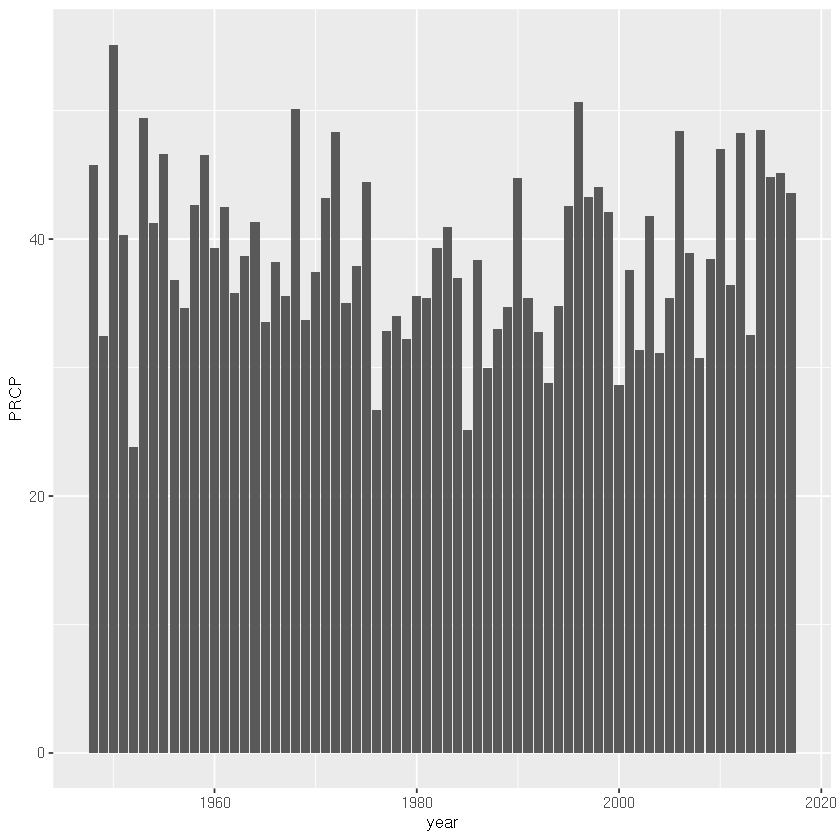

In [51]:
# graph by month
ggplot(data = rain,
       aes(year, PRCP)) +
    stat_summary(fun.y = sum, # adds up all observations for each month
                geom = "bar") 


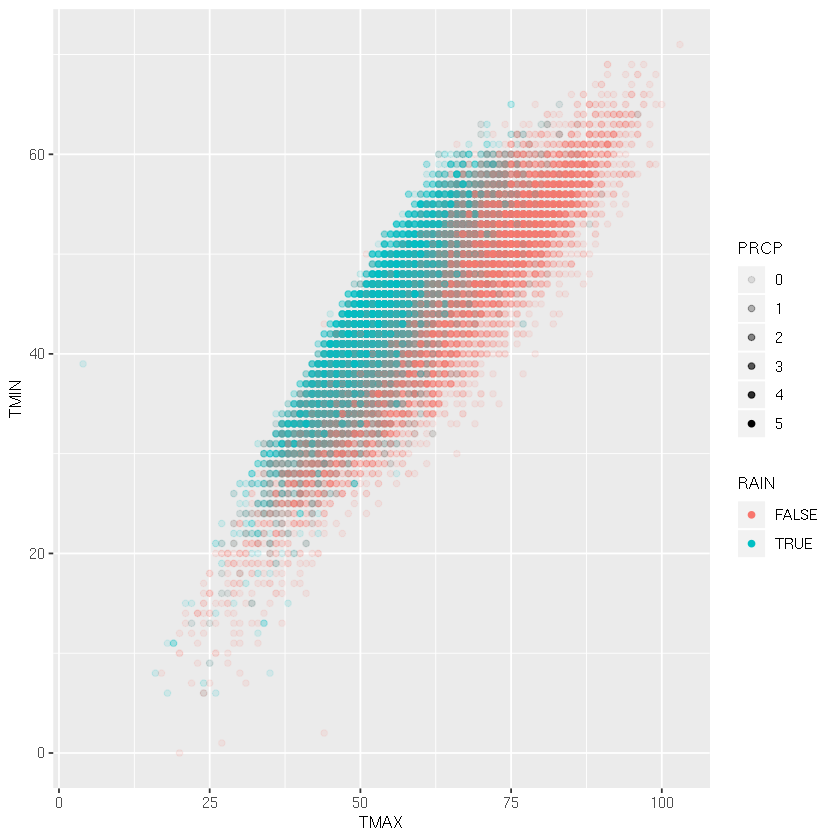

In [52]:
ggplot(data = rain) + 
    geom_point(mapping = aes(x = TMAX, y = TMIN, color = RAIN, alpha = PRCP))

In [53]:
summary(rain)

      DATE                 PRCP             TMAX             TMIN      
 Min.   :1948-01-01   Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:1965-06-26   1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :1982-12-21   Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :1982-12-22   Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:2000-06-18   3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :2017-12-14   Max.   :5.0200   Max.   :103.00   Max.   :71.00  
    RAIN              year          day           
 Mode :logical   Min.   :1948   Length:25548      
 FALSE:14648     1st Qu.:1965   Class :character  
 TRUE :10900     Median :1982   Mode  :character  
                 Mean   :1982                     
                 3rd Qu.:2000                     
                 Max.   :2017                     

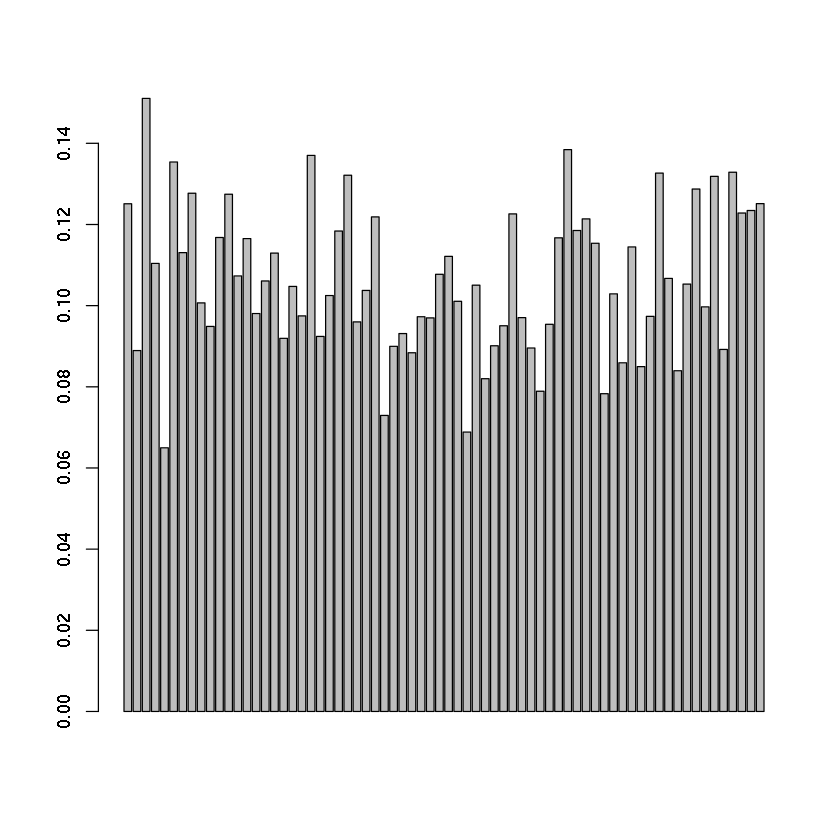

In [55]:
rain.means <- aggregate(x = rain$PRCP, by = list(rain$year), mean, na.rm = TRUE)
barplot(rain.means$x)

average annual rainfall is 0.1062

In [56]:
mean(rain.means$x)

[1] 0.1062366

## Hypothesis Testing 1

> The average annual rainfall for the Seattle-Tacoma area is 0.106 inches. the meteorologist believes in 2017 there was above average rainfall during this period that the average annnual rainfall was significantly different from the overall average rainfalll annual rainfall of 0.106 inches. 

In [57]:
sd(rain$PRCP)

[1] 0.2390315

In [59]:
oneway.test(rain$PRCP ~ rain$year)


	One-way analysis of means (not assuming equal variances)

data:  rain$PRCP and rain$year
F = 2.463, num df = 69.0, denom df = 8738.2, p-value = 2.338e-10


In [60]:
summary(lm(rain$PRCP ~ rain$year))


Call:
lm(formula = rain$PRCP ~ rain$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1065 -0.1063 -0.1060 -0.0061  4.9139 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.225e-01  1.468e-01   0.835    0.404
rain$year   -8.228e-06  7.406e-05  -0.111    0.912

Residual standard error: 0.239 on 25546 degrees of freedom
Multiple R-squared:  4.832e-07,	Adjusted R-squared:  -3.866e-05 
F-statistic: 0.01234 on 1 and 25546 DF,  p-value: 0.9115


### Test 2

In [61]:
summary(rain)

      DATE                 PRCP             TMAX             TMIN      
 Min.   :1948-01-01   Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:1965-06-26   1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :1982-12-21   Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :1982-12-22   Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:2000-06-18   3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :2017-12-14   Max.   :5.0200   Max.   :103.00   Max.   :71.00  
    RAIN              year          day           
 Mode :logical   Min.   :1948   Length:25548      
 FALSE:14648     1st Qu.:1965   Class :character  
 TRUE :10900     Median :1982   Mode  :character  
                 Mean   :1982                     
                 3rd Qu.:2000                     
                 Max.   :2017                     

In [63]:
model1 <- lm(PRCP ~ RAIN, data = rain)
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
RAIN,1,387.3777,387.37768441,9228.915,0
Residuals,25546,1072.2767,0.04197435,NA,NA


In [64]:
summary(model1)


Call:
lm(formula = PRCP ~ RAIN, data = rain)

Residuals:
   Min     1Q Median     3Q    Max 
-0.239 -0.059  0.000  0.000  4.771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.563e-16  1.693e-03    0.00        1    
RAINTRUE     2.490e-01  2.592e-03   96.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2049 on 25546 degrees of freedom
Multiple R-squared:  0.2654,	Adjusted R-squared:  0.2654 
F-statistic:  9229 on 1 and 25546 DF,  p-value: < 2.2e-16


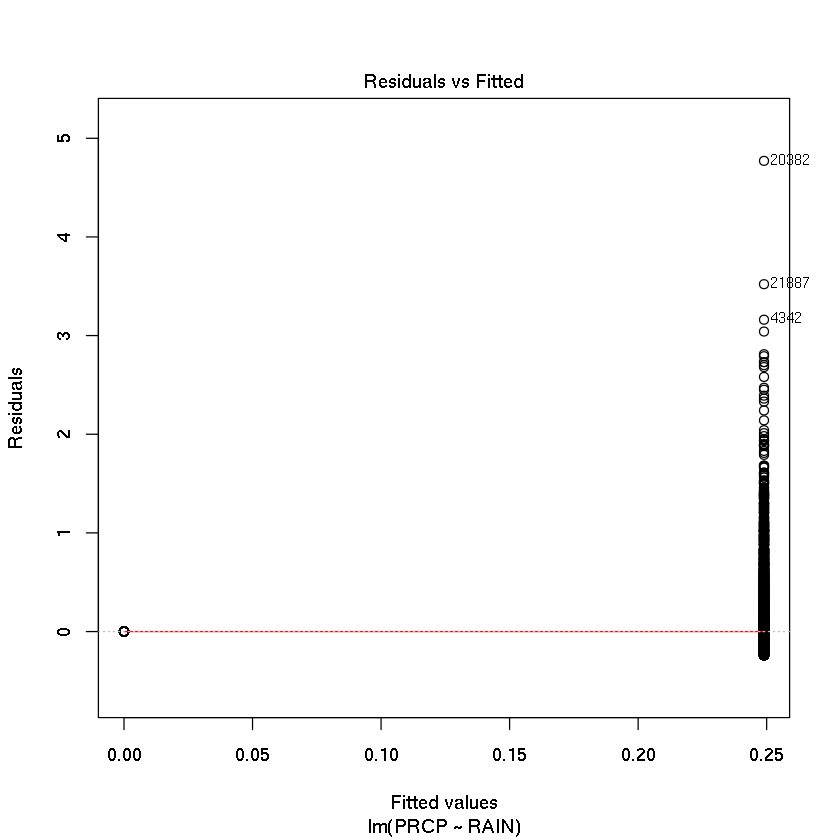

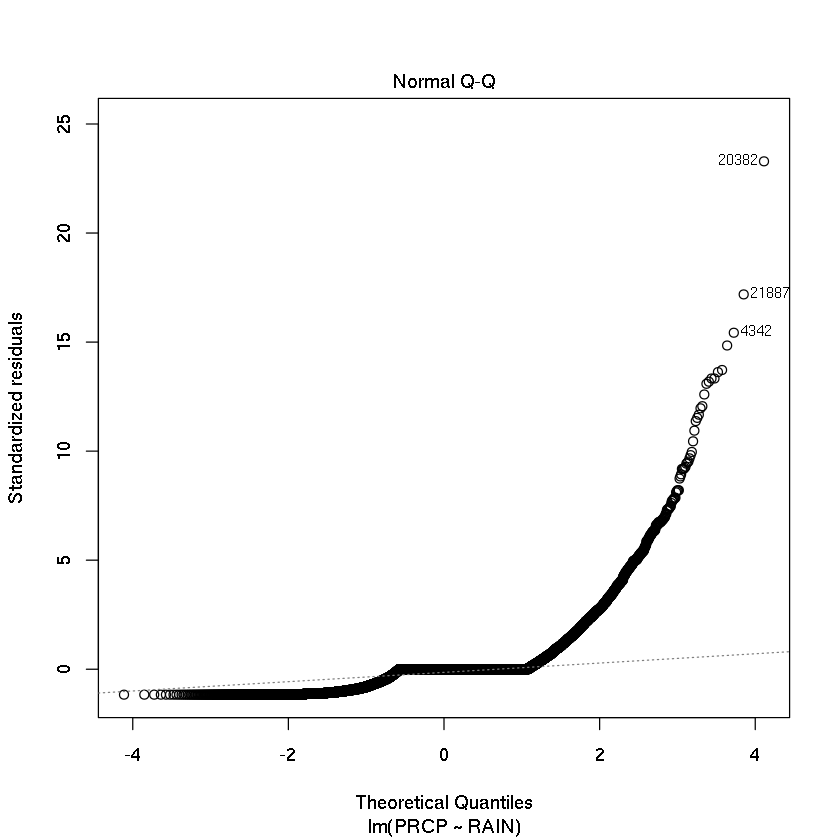

In [66]:
plot(model1, which = 1:2)

### OTHER WIP

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

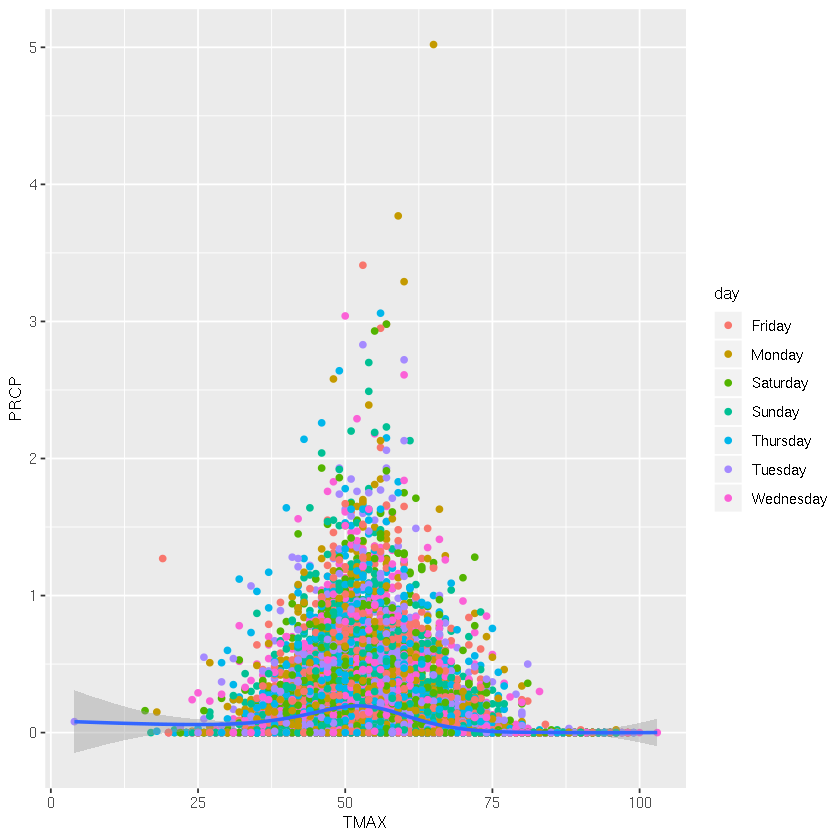

In [19]:
ggplot(data = rain, mapping = aes(x = TMAX, y = PRCP)) + 
  geom_point(mapping = aes(color = day)) + 
  geom_smooth()

ERROR: Error in density.default(rain): argument 'x' must be numeric


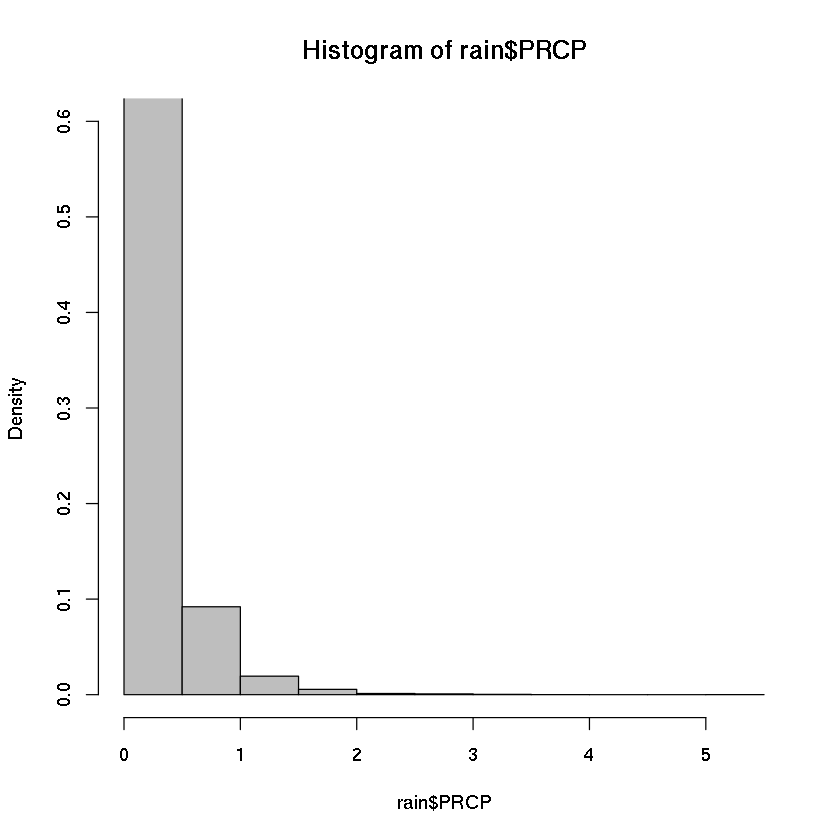

In [22]:
hist(rain$PRCP, probability = TRUE, col = "grey", ylim = c(0, 0.6))
lines(density(rain$PRCP), col = "red")

From the above scatter plot we can see the relationship between the max temp and min tem

Warning message:
“Removed 3 rows containing missing values (geom_point).”

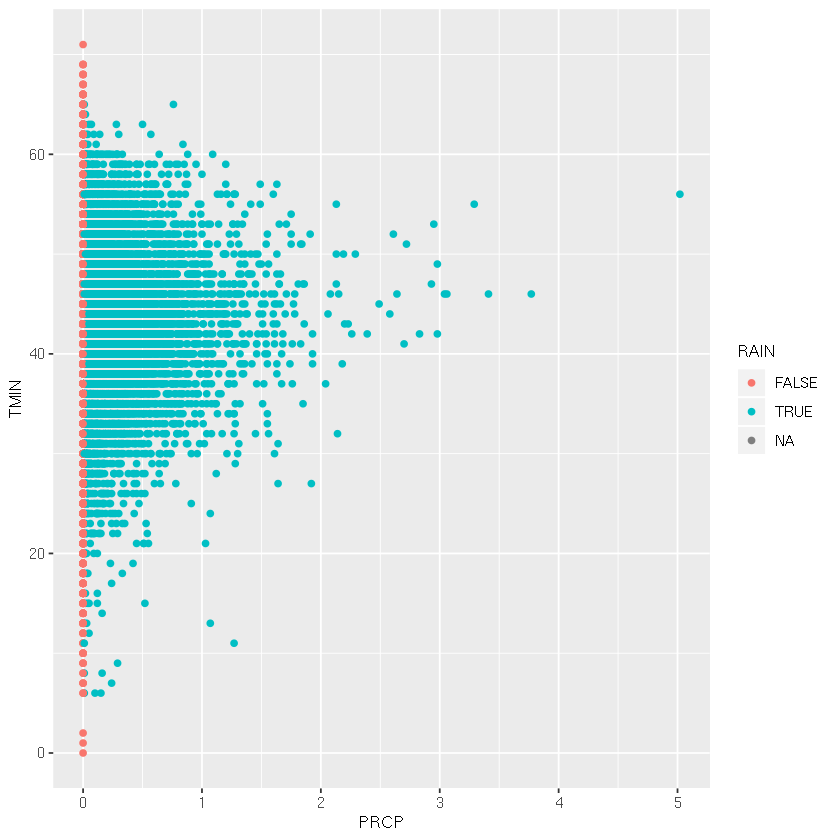

In [10]:
ggplot(data = dat) + 
    geom_point(mapping = aes(x = PRCP, y = TMIN, color = RAIN))

In [11]:
dat$DATE[2]

[1] 1948-01-02
25551 Levels: 1948-01-01 1948-01-02 1948-01-03 1948-01-04 ... 2017-12-14

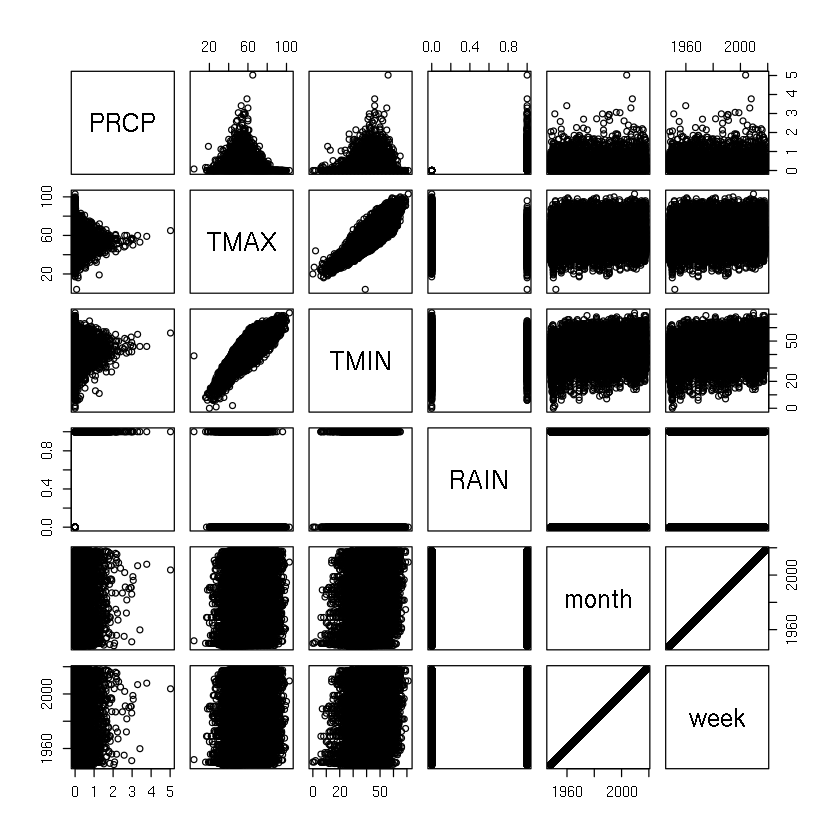

In [11]:
pairs(rain[,-1 ])